In [1]:
import  os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 
# 0 - Tumor
# 1 - Normal


OneHotEncoder()

In [3]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk(r'./brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        

In [4]:
paths=[]
for r,d,f in os.walk(r'./brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        

In [5]:
data = np.array(data)

In [6]:
data.shape

(139, 128, 128, 3)

In [7]:
result=np.array(result)

In [8]:
result.shape

(139, 1, 2)

In [9]:
result=result.reshape(139,2)

In [10]:
result.shape

(139, 2)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [13]:
y_train.shape

(111, 2)

In [14]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))


Epoch 1/30
3/3 [==============================] - 20s 1s/step - loss: 21.9357 - accuracy: 0.5495 - val_loss: 29.0919 - val_accuracy: 0.6786
Epoch 2/30
3/3 [==============================] - 0s 142ms/step - loss: 15.2982 - accuracy: 0.7297 - val_loss: 12.1310 - val_accuracy: 0.7857
Epoch 3/30
3/3 [==============================] - 0s 146ms/step - loss: 4.1862 - accuracy: 0.8378 - val_loss: 5.7017 - val_accuracy: 0.7500
Epoch 4/30
3/3 [==============================] - 0s 143ms/step - loss: 2.7703 - accuracy: 0.8649 - val_loss: 17.7241 - val_accuracy: 0.6429
Epoch 5/30
3/3 [==============================] - 0s 146ms/step - loss: 1.2148 - accuracy: 0.9189 - val_loss: 22.1932 - val_accuracy: 0.6429
Epoch 6/30
3/3 [==============================] - 0s 143ms/step - loss: 1.0972 - accuracy: 0.9189 - val_loss: 20.0317 - val_accuracy: 0.6429
Epoch 7/30
3/3 [==============================] - 0s 128ms/step - loss: 0.6200 - accuracy: 0.9459 - val_loss: 18.1147 - val_accuracy: 0.6429
Epoch 8/30
3/3

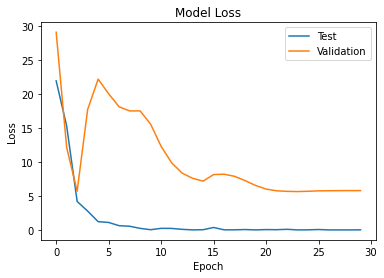

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()


In [16]:
history.history['accuracy']

[0.5495495200157166,
 0.7297297120094299,
 0.837837815284729,
 0.8648648858070374,
 0.9189189076423645,
 0.9189189076423645,
 0.9459459185600281,
 0.9459459185600281,
 0.9729729890823364,
 0.9909909963607788,
 0.9729729890823364,
 0.9909909963607788,
 0.9729729890823364,
 1.0,
 0.9909909963607788,
 0.9639639854431152,
 0.9909909963607788,
 0.9909909963607788,
 0.9909909963607788,
 1.0,
 0.9909909963607788,
 0.9909909963607788,
 0.9819819927215576,
 1.0,
 0.9909909963607788,
 0.9819819927215576,
 1.0,
 1.0,
 1.0,
 0.9909909963607788]

In [17]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence No, Its not a tumor


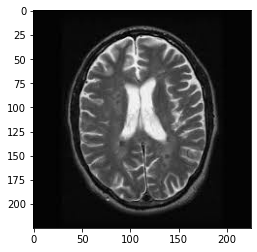

In [18]:
#prediction for a image which is not having tumor

from matplotlib.pyplot import imshow
img = Image.open(r'E:\Desktop Files\Machine Learning\Deep learning class lab\Brain Tumor Recognition\brain_tumor_dataset\no\21 no.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

In [19]:
#prediction for a image which is having tumor

from matplotlib.pyplot import imshow
img = Image.open(r'E:\Desktop Files\Machine Learning\Deep learning class lab\Braib Tumor Recognition\brain_tumor_dataset\yes\Y18.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Desktop Files\\Machine Learning\\Deep learning class lab\\Braib Tumor Recognition\\brain_tumor_dataset\\yes\\Y18.jpg'